Article : [https://medium.com/mlearning-ai/machine-learning-project-with-linear-regression-algorithm-b433d770fefd](https://)


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Preprocessing the data

In [ ]:
data['sex'] = data['sex'].astype('category')
data['region'] = data['region'].astype('category')
data['smoker'] = data['smoker'].astype('category')

Data structure again 

In [ ]:
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


groupby() method

In [ ]:
smoke_data=data.groupby("smoker").mean().round(2)
#Note : smoker not smokers

In [ ]:
smoke_data

,age,bmi,children,charges
smoker,,,,
no,39.39,30.65,1.09,8434.27
yes,38.51,30.71,1.11,32050.23


Data Visualization

In [ ]:
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")

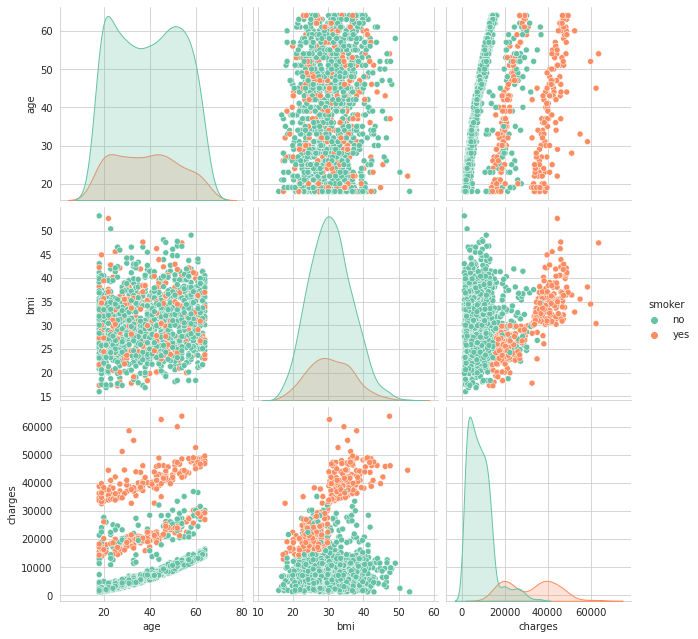

In [ ]:
sns.pairplot(
    data[["age","bmi","charges","smoker"]],
    hue="smoker",
    height=3,
    palette="Set2")
#Set2 instead Set1

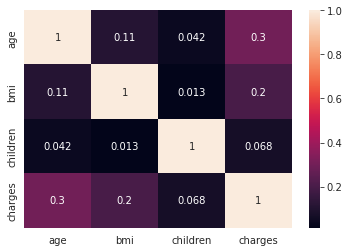

In [ ]:
sns.heatmap(data.corr(), annot= True)

In [ ]:
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data = pd.get_dummies(data)

In [ ]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

Building The Model

In [ ]:
y=data["charges"]

In [ ]:
x=data.drop("charges",axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    train_size=0.80,
    random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_test,y_test).round(3)

0.762

In [ ]:
lr.score(x_train,y_train).round(3)

0.748

Ridge and lasso models can be used for overfitting problem

Mean squared error

In [ ]:
y_pred = lr.predict(x_test)

Mean squared error metric.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
import math

Calculating the square root of the mean squares error

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

5956.454717976426

Prediction part 

In [ ]:
data_new = x_train[:1]

In [ ]:
lr.predict(data_new)

array([10508.41885042])

In [ ]:
y_train[:1]

216    10355.641
Name: charges, dtype: float64